# **Laboratorio 6: Perceptron simple**

*   Juan Esteban Oviedo Garcia
*   Juliana Catalina de Castro Moreno
*   Luis Fernando Mendez Marques
*   Santiago Cassiano Rozo
*   Ivan Alexander Morales Muñoz
*   Nicolás Mauricio Rincón Vija

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
import sklearn
from google.colab import files
pd.set_option('display.max_columns', 500)

# Definición de la clase perceptron 



In [ ]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10): #O(1)
        self.eta = float(eta) #O(1)
        self.n_iter = n_iter #O(1)

    def train(self, X, y): #O(n_iter)*O(X)*O(numero_caracteristicas) | O(n^3)

        #Iniciar los pesos con valores aleatorios
        self.w = np.random.uniform(low=0, size=len(X[1])+1) #O(1)
        #vector de errores acumulados
        self.errors = [] #O(1)

        #ciclo de entrenamiento
        for i in range(self.n_iter): #O(n_iter)*O(X)*O(numero_caracteristicas) | O(n^3)
            errors = 0 #O(1)
            for x_i, target in zip(X,y): #O(X)*O(numero_caracteristicas) | O(n^2)
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(x_i)) * self.eta) #O(numero_caracteristicas) == O(len(x_i))| O(n)
                #actualizar el valor de los pesos
                self.w[1:] += delta_w * x_i #O(numero_caracteristicas) | O(n)
                #actualizar el valor del bias
                self.w[0] += delta_w #O(1)
                if (delta_w!=0):  #O(1)
                    errors += 1 #O(1)
            self.errors.append(errors) #O(1)
 

    def predict(self, X): #O(numero_caracteristicas) == O(len(X))| O(n)
        #combinacion lineal, w[0] = bias
        v = np.dot( X, self.w [1:]) + self.w[0] #O(numero_caracteristicas) | O(n)
        #funcion de activación 
        if v > 0.0: #O(1)
            return 1 #O(1)
        return -1 #O(1)

# Leer el Raisin Dataset

El dataset Raisin incluye datos sobre 2 variedades de uvas pasas (Kecimen y Besni). El Dataset contiene 900 registros, de los cuales la mitad corresponden a uvas Kecimen y la otra mitad a uvas Besni. Cada registro contiene los siguientes datos:

Area, Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extend y Class (Kecimen, Besni).

En este caso solo se utilizaran los datos MajorAxisLength y Extent como datos de entrada del perceptron, a partir de ellos se intentara clasificar las uvas como tipo Besni o Kecimen.

El dataset esta disponible en https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

In [ ]:
#Leer los datos del archivo. El archivo debe estar guardado en el entorno de trabajo para ejecutarse en google colab
df = pd.read_csv('Raisin_Dataset.csv', sep=";", decimal=",").sample(900)

#tomar las columnas MajorAxisLength y Extent de todos los datos
raisin_df = df[0::][['MajorAxisLength','Extent']]
#tomar la columna especie como 1 para Kecimen y -1 para Besni
y_raisin = df[0:900][["Class"]]

raisin_df = np.array(raisin_df, float)

y_raisin = np.where(y_raisin == 'Kecimen', 1, -1)
print("Primeros valores del dataset")
print(df.head(100))

Primeros valores del dataset
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
674   76114       435.387915       224.727631      0.856495       77824   
14    74167       387.798931       247.858123      0.769090       76807   
529   74652       424.980673       231.604265      0.838452       79014   
622  193818       678.559565       367.900362      0.840263      201241   
244   85739       380.370379       288.256159      0.652452       87052   
..      ...              ...              ...           ...         ...   
109   65396       331.538445       253.242966      0.645403       66783   
815  117354       520.326612       289.661986      0.830719      121057   
780   71141       417.137000       219.185252      0.850824       73629   
433   74254       402.526482       241.283439      0.800433       76702   
493   72606       424.472024       223.232633      0.850542       76975   

       Extent  Perimeter    Class  
674  0.681927   1100.929    Besni 

# Selección de datos

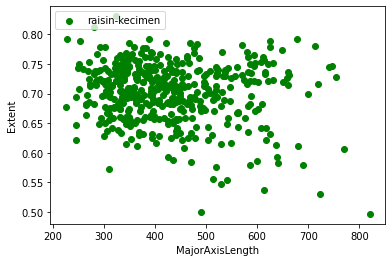

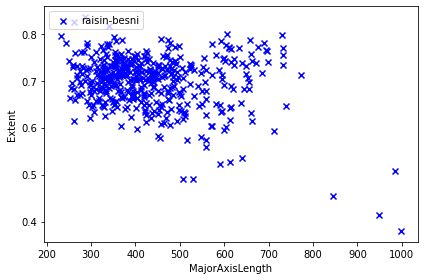

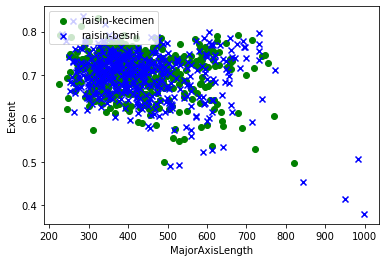

In [ ]:
# Kecimen raisin
plt.scatter(raisin_df[:450, 0], raisin_df[:450, 1], color='green', marker='o', label='raisin-kecimen')
plt.xlabel('MajorAxisLength')
plt.ylabel('Extent')
plt.legend(loc='upper left')
plt.show()
print("\n\n")
# Besni raisin
plt.scatter(raisin_df[450:, 0], raisin_df[450:, 1], color='blue', marker='x', label='raisin-besni')
plt.xlabel('MajorAxisLength')
plt.ylabel('Extent')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
print("\n\n")

# Combinacion
plt.scatter(raisin_df[:450, 0], raisin_df[:450, 1], color='green', marker='o', label='raisin-kecimen')
plt.scatter(raisin_df[450:, 0], raisin_df[450:, 1], color='blue', marker='x', label='raisin-besni')
plt.xlabel('MajorAxisLength')
plt.ylabel('Extent')
plt.legend(loc='upper left')
plt.show()

Como se puede ver en la gráfica los datos MajorAxisLength y Extent length NO son linealmente diferenciables, es decir, a partir de ellos es dificil distinguir entre una uva Kecimen y una uva Besni ya que ambos tipos de uvas tienen valores muy parecidos en dichas caracteristicas. Esto causara que el percepton cometa varios errores al intentar clasificar las uvas Kecimen y Besni.

# Entrenamiento del perceptron

Se toma el 80% del dataset para entrenar el perceptron.



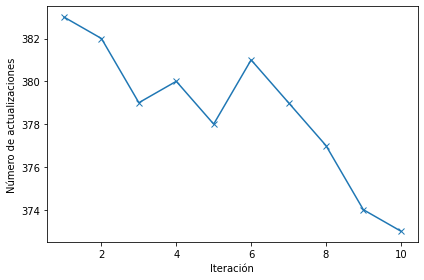

In [ ]:
#tomar el 80 % del dataset para el entrenamiento
X_training = np.concatenate((raisin_df[:360],raisin_df[450:810]),axis=0)
y_training = np.concatenate((y_raisin[:360],y_raisin[450:810]),axis=0)


#entrenar el perceptron
perceptron = Perceptron(0.1, 10)
perceptron.train(X_training, y_training)
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='x')
plt.xlabel('Iteración')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

# Prueba del perceptron
Se toma el 20% restante del dataset para probar el perceptron

In [ ]:
#Tomar el 20% restante del dataset para probar el perceptron
X_test = np.concatenate((raisin_df[361:450],raisin_df[810:]),axis=0)
y_test = np.concatenate((y_raisin[361:450],y_raisin[810:]),axis=0)

#calcular los errores en la clasificacion 
error = 0
for i in range(0,len(X_test)):
    if perceptron.predict(X_test[i]) != y_test[i]:
        error += 1 
error = error / len(X_test) * 100
print("error = {}%".format(error))

error = 47.486033519553075%


El perceptron simple presentó alrededor de un **53**% de exactitud.



**Ejemplo de prediccion:**

Empleando los siguientes datos el resultado debería ser -1, representando un raisin de tipo Besni.

In [ ]:
perceptron.predict(np.array([439.9605034, 0.698250157]))

-1

# Analisis de complejidad especifica y generalizada:

Analisis de complejidad especifica: O(n_iter) * O(x) * O(numero_caracteristicas)

El proceso de mayor complejidad durante la ejecución del programa es el entrenamiento del perceptron, es decir, la ejecución del metodo train() en la clase Perceptron.

Entonces el metodo Train es el que determina la complejidad del programa. La complejidad de dicho metodo se puede representar en terminos de los parametros de entrada como O(n_iter) * O(x) * O(numero_caracteristicas)

Es decir que la complejidad de este metodo depende principalmente de 3 valores:

**n_iter:** Este valor representa la cantidad de iteraciones que se realizaran en el entrenamiento. Si unicamente se incrementa el valor de **n_iter**, el tiempo del algoritmo incrementara linealmente por O(n_iter).

**x:** Este valor representa la cantidad de registros que se utilizaran para entrenar el perceptron. Si unicamente se incrementa el valor de **x**, el tiempo del algoritmo incrementara acotada por O(x).

**numero_caracteristicas:** Este valor representa la cantidad de caracteristicas que tiene cada registro que se usa para entrenar el perceptron, en el caso del perceptron que utilizamos son 2 (MajorAxisLength y Extent). Si unicamente se incrementa el valor de **numero_caracteristicas**, el tiempo del algoritmo incrementara acotada por O(numero_caracteristicas).

Cabe resaltar que el perceptron tambien recibe otro paramentro de entrada el cual es **eta** que representa el valor de la tasa de aprendizaje del perceptron, pero dicho valor no afecta en la complejidad del programa al solo ser usada como una constante en las operaciones de entrenamiento.


Si se generaliza la complejidad del programa obtenida en la anterior seccion, se obtiene que el programa tiene una complejidad de O(n^3), es decir que si se incrementan al tiempo los parametros **n_iter**, **x** y **numero_caracteristicas** el tiempo de ejecución del programa puede crecer en gran medida.

# Analisis de los resultados en función de la separabilidad de los datos:


En el dataset utilizado, las dos caracteristicas tomadas (MajorAxisLength y Extent) no son lo suficientemente distinguibles entre las uvas Kecimen y las uvas Besni como para que el perceptron pueda clasificarlas. 

Los datos de las Uvas Kecimen y Besni no son separables, esto se puede observar cuando se graficaron las uvas en funcion de las caracteristicas MajorAxisLength y Extend las uvas eran muy parecidas entre si y sus puntos se ubicaban en casi la misma region.

Ademas puede observar que en todas las iteraciones en el entramiento el perceptron comete muchos errores (entre 348 y 360) lo cual hace que actualice muchas veces su pesos, y se puede observar que no hay una tendencia a que la cantidad de errores disminuya, ya que es muy dificil distinguir los dos tipos de uvas.

Es por ello que el perceptron tiene un porcentaje de error alto del **47**% al realizar las pruebas, las uvas son muy parecidas entre si, entonces el perceptron no puede ajustar los pesos de sus conexiones para poder distinguirlas y se equivoca al intentar clasificarlas.

# Referencias
*   https://web.archive.org/web/20190213060442/https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/

*   https://machinelearningmastery.com/standard-machine-learning-datasets/

*   https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset